<a href="https://colab.research.google.com/github/kj824/Final-Team2/blob/main/%EA%B3%A0%EA%B2%BD%EC%A7%84_%EA%B0%80%EC%84%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/파이널프로젝트/combined_dataset.csv")

In [2]:
%%capture
# 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
plt.rcParams['font.family'] = 'NanumGothic'

---

#호스트 등급에 따른 숙소 평점 분포
###
 가설: 호스트 등급에 따라 숙소 유형별 평점 분포에서 차이가 있으며, 슈퍼호스트일수록 유형에 관계없이 높은 평점을 유지할 것이다.

신규호스트 vs 일반호스트 vs 슈퍼호스트 간의 숙소 유형별 평점 차이
- 신규호스트 리뷰 수 5개 미만으로 두고
- 일반호스트는 리뷰 5개 이상
- 슈퍼호스트는 그 이상

정리
- 신규호스트는 리뷰 적은 초보 호스트
- 일반호스트는 리뷰는 어느정도 있지만 아직 슈퍼호스트는 아닌 단계
- 슈퍼호스트는 에어비앤비의 기준을 충족함

컬럼
- property_type : 숙소 유형
- number_of_reviews : 전체 리뷰 수
- review_scores_rating : 전체 평점

## 데이터 확인 및 결측치 제거

In [3]:
#리뷰 수
df['number_of_reviews'].value_counts()

,count
number_of_reviews,
0,1497
1,654
2,536
3,403
5,293
...,...
355,1
541,1
634,1


In [4]:
df['number_of_reviews'].isna().sum()

np.int64(0)

In [5]:
df['property_type'].isna().sum()

np.int64(0)

In [6]:
df['review_scores_rating'].isna(). sum()

np.int64(1495)

In [7]:
df['review_scores_rating'].describe()

,review_scores_rating
count,9951.000000
mean,4.682039
std,0.434840
min,0.000000
25%,4.590000
50%,4.800000
75%,4.930000
max,5.000000


In [8]:
#결측치, 0점 제거
df_clean = df[
    (df["review_scores_rating"].notna()) &
    (df["review_scores_rating"] > 0)
].copy()

## 숙소 유형 확인 및 Top5 만 뽑아내기

In [9]:
df['property_type'].unique()

array(['Entire rental unit', 'Entire serviced apartment',
       'Private room in rental unit', 'Entire condo', 'Entire loft',
       'Room in aparthotel', 'Shared room in bed and breakfast',
       'Private room in bed and breakfast', 'Room in serviced apartment',
       'Entire guest suite', 'Private room in serviced apartment',
       'Private room in home', 'Private room in condo',
       'Room in boutique hotel', 'Entire home', 'Private room in loft',
       'Private room in townhouse', 'Room in hotel', 'Entire townhouse',
       'Shared room in hostel', 'Houseboat', 'Entire bed and breakfast',
       'Private room in guest suite', 'Boat', 'Entire villa',
       'Shared room in rental unit', 'Private room in villa',
       'Private room in hostel', 'Room in bed and breakfast',
       'Room in hostel', 'Private room', 'Entire guesthouse', 'Tiny home',
       'Shared room in condo', 'Entire cottage', 'Entire place',
       'Private room in boat', 'Entire cabin',
       'Private room

In [10]:
# 숙소 유형별 빈도 (내림차순)
type_counts = df_clean["property_type"].value_counts()

print(type_counts.head(10))   # 상위 10개
print("\n전체 유형 개수:", df_clean["property_type"].nunique())

property_type
Entire rental unit             5752
Entire condo                    957
Private room in rental unit     907
Entire serviced apartment       831
Room in hotel                   192
Private room in condo           167
Entire loft                     156
Private room in home            114
Entire home                     109
Room in boutique hotel           81
Name: count, dtype: int64

전체 유형 개수: 56


In [11]:
# 리뷰 수 기준 상위 5개 숙소 유형 선택
top5_types = df_clean["property_type"].value_counts().nlargest(5).index

# 해당 숙소 유형만 필터링
df_top5 = df_clean[df_clean["property_type"].isin(top5_types)]

print(df_top5["property_type"].value_counts())

property_type
Entire rental unit             5752
Entire condo                    957
Private room in rental unit     907
Entire serviced apartment       831
Room in hotel                   192
Name: count, dtype: int64


## 호스트 분류 - 신규/일반/슈퍼

In [12]:
# 호스트 레벨 분류 함수
def classify_host(row):
    if row["host_is_superhost"] == "t":   # 슈퍼호스트
        return "슈퍼호스트"
    elif row["number_of_reviews"] < 5:    # 리뷰 5개 미만
        return "신규호스트"
    else:                                 # 나머지
        return "일반호스트"

# 새로운 컬럼 생성
df_clean["host_level"] = df.apply(classify_host, axis=1)

# 결과 확인
print(df_clean["host_level"].value_counts())

host_level
일반호스트    4484
슈퍼호스트    3906
신규호스트    1556
Name: count, dtype: int64


In [13]:
#숙소 유형별 호스트 등급 분포
df_clean.groupby(["property_type", "host_level"]).size()

property_type                      host_level
Boat                               신규호스트         1
Camper/RV                          신규호스트         4
                                   일반호스트         4
Cave                               슈퍼호스트         1
Entire bed and breakfast           일반호스트         1
                                                ..
Shared room in serviced apartment  슈퍼호스트         1
                                   일반호스트         1
Tent                               신규호스트         1
Tiny home                          슈퍼호스트         5
                                   일반호스트         3
Length: 123, dtype: int64

## 숙소 유형 + 호스트 등급 별 리뷰 mean/sum/count

In [14]:
# 숙소 유형 + 호스트 등급별 리뷰 평균 집계
df_top5 = df_clean[df_clean['property_type'].isin(top5_types)].copy()
review_table = (
    df_top5.groupby(["property_type", "host_level"])["number_of_reviews"]
    .mean()
    .reset_index()
    .pivot(index="property_type", columns="host_level", values="number_of_reviews")
    .fillna(0)
    .astype(int)
)

print(review_table)

host_level                   슈퍼호스트  신규호스트  일반호스트
property_type                                   
Entire condo                    85      2     52
Entire rental unit             107      2     78
Entire serviced apartment       57      2     40
Private room in rental unit    110      2     67
Room in hotel                  107      2     27


In [15]:
# 숙소 유형 + 호스트 등급별 리뷰 합계 집계
review_table = (
    df_top5.groupby(["property_type", "host_level"])["number_of_reviews"]
    .sum()
    .reset_index()
    .pivot(index="property_type", columns="host_level", values="number_of_reviews")
    .fillna(0)
    .astype(int)
)

print(review_table)

host_level                    슈퍼호스트  신규호스트   일반호스트
property_type                                     
Entire condo                  41487    175   20509
Entire rental unit           253519   1706  205377
Entire serviced apartment     30738    141    9552
Private room in rental unit   17105    570   32410
Room in hotel                  2369    145    2734


In [16]:
# 숙소 유형 + 호스트 등급별 리뷰 개수 집계
review_table = (
    df_top5.groupby(["property_type", "host_level"])["number_of_reviews"]
    .count()
    .reset_index()
    .pivot(index="property_type", columns="host_level", values="number_of_reviews")
    .fillna(0)
    .astype(int)
)

print(review_table)

host_level                   슈퍼호스트  신규호스트  일반호스트
property_type                                   
Entire condo                   487     82    388
Entire rental unit            2354    784   2614
Entire serviced apartment      537     59    235
Private room in rental unit    155    273    479
Room in hotel                   22     71     99


## 시각화

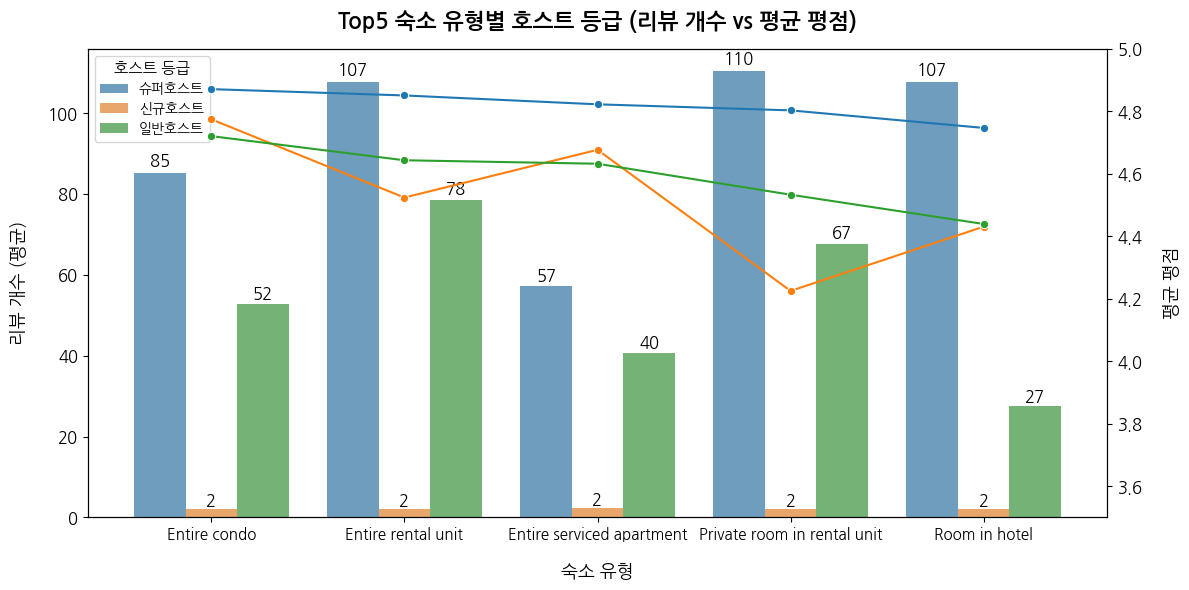

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 숙소 유형 + 호스트 레벨별 집계
grouped = (
    df_top5.groupby(["property_type", "host_level"])
    .agg(
        avg_rating=("review_scores_rating", "mean"),        # 평균 평점
        review_mean=("number_of_reviews", "mean"),        # 숙소당 평균 리뷰 수
        host_count=("id", "count")              # 숙소 개수
    )
    .reset_index()
)
grouped = grouped.rename(columns={"property_type": "숙소 유형"})

# 시각화
fig, ax1 = plt.subplots(figsize=(12,6))

# 막대: 리뷰 총합
sns.barplot(
    data=grouped,
    x="숙소 유형", y="review_mean", hue="host_level",
    ax=ax1, alpha=0.7
)
ax1.set_ylabel("리뷰 개수 (평균)", fontsize = 13, labelpad=15)
ax1.tick_params(axis="y", labelsize=12)

# 막대 위에 숫자 표시
for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.text(
            p.get_x() + p.get_width()/2, height + (height*0.01),
            f"{int(height)}", ha="center", va="bottom", fontsize=12, color="black"
        )

# 선: 평균 평점 (이중축)
ax2 = ax1.twinx()
sns.lineplot(
    data=grouped,
    x="숙소 유형", y="avg_rating", hue="host_level",
    marker="o", ax=ax2
)
ax2.set_ylabel("평균 평점", fontsize = 13, labelpad=15)
ax2.set_ylim(3.5, 5.0)
ax2.tick_params(axis="y", labelsize=12)

ax2.get_legend().remove()  # 보조축 범례 제거
ax1.legend(
    title="호스트 등급",   # 범례 제목
    loc="upper left",      # 위치
    fontsize=10,           # 글자 크기
    title_fontsize=11      # 제목 글자 크기
)

plt.title("Top5 숙소 유형별 호스트 등급 (리뷰 개수 vs 평균 평점)", fontsize=16, pad = 15, fontweight='bold')
ax1.tick_params(axis="x", labelsize=11)   # X축 글자 크기
ax1.set_xlabel("숙소 유형", labelpad=15, fontsize = 13)
fig.tight_layout()
plt.show()


인사이트
- 신규 호스트는 모든 숙소 유형에서 평균 리뷰 2개 내외, 최대 4개 수준으로 매우 적음
    - 초기 평점이 불안정하며, 숙소 유형별로 평점 편차가 크게 나타남
- 일반호스트는 리뷰 수가 쌓여 평균 평점이 안정화 되어있음
    - 슈퍼호스트보다는 다소 낮지만 신규호스트 대비 신뢰성이 높음
- 슈퍼호스트는 대부분의 유형에서 가장 높은 평점을 유지하고 리뷰 수도 압도적으로 많음
    - 다만 일부 유형에서는 신규/일반 대비 큰 차이가 없는 경우도 있어 지속적인 관리가 필요 (Entire condo, Entire serviced apartment property_type)

## 신규호스트 필터링

In [18]:
# 숙소 유형 + 호스트 등급별 집계
grouped = (
    df_top5.groupby(["property_type", "host_level"])
    .agg(
        avg_rating=("review_scores_rating", "mean"),   # 평균 평점
        review_mean=("number_of_reviews", "mean"),     # 숙소당 평균 리뷰 수
        review_max=("number_of_reviews", "max"),       # 숙소당 리뷰 수 최댓값
        host_count=("number_of_reviews", "count")      # 숙소 개수
    )
    .reset_index()
)

print(grouped)

                  property_type host_level  avg_rating  review_mean  \
0                  Entire condo      슈퍼호스트    4.870986    85.188912   
1                  Entire condo      신규호스트    4.774512     2.134146   
2                  Entire condo      일반호스트    4.720593    52.858247   
3            Entire rental unit      슈퍼호스트    4.850794   107.697111   
4            Entire rental unit      신규호스트    4.523903     2.176020   
5            Entire rental unit      일반호스트    4.643305    78.568095   
6     Entire serviced apartment      슈퍼호스트    4.822384    57.240223   
7     Entire serviced apartment      신규호스트    4.676780     2.389831   
8     Entire serviced apartment      일반호스트    4.632213    40.646809   
9   Private room in rental unit      슈퍼호스트    4.803032   110.354839   
10  Private room in rental unit      신규호스트    4.225092     2.087912   
11  Private room in rental unit      일반호스트    4.533048    67.661795   
12                Room in hotel      슈퍼호스트    4.746818   107.681818   
13    

In [19]:
#신규 호스트만 필터링
grouped = (
    df_top5.groupby(["property_type", "host_level"])
    .agg(
        avg_rating=("review_scores_rating", "mean"),   # 평균 평점
        review_mean=("number_of_reviews", "mean"),     # 숙소당 평균 리뷰 수
        review_max=("number_of_reviews", "max"),       # 숙소당 리뷰 수 최댓값
        host_count=("number_of_reviews", "count")      # 숙소 개수
    )
    .reset_index()
)
newhost_check = grouped[grouped["host_level"] == "신규호스트"]

print(newhost_check)

                  property_type host_level  avg_rating  review_mean  \
1                  Entire condo      신규호스트    4.774512     2.134146   
4            Entire rental unit      신규호스트    4.523903     2.176020   
7     Entire serviced apartment      신규호스트    4.676780     2.389831   
10  Private room in rental unit      신규호스트    4.225092     2.087912   
13                Room in hotel      신규호스트    4.430845     2.042254   

    review_max  host_count  
1            4          82  
4            4         784  
7            4          59  
10           4         273  
13           4          71  


---
##카테고리별 숙소 분포

In [20]:
df['property_type'].value_counts()

,count
property_type,
Entire rental unit,6500
Private room in rental unit,1229
Entire condo,1022
Entire serviced apartment,896
Room in hotel,282
...,...
Private room in camper/rv,1
Entire chalet,1
Shared room in loft,1


# 카테고리 매핑 (수정완)

In [24]:
# 숙소 유형 → 카테고리 매핑
category_map = {
    # 호텔
    "Room in hotel": "호텔",
    "Room in boutique hotel": "호텔",

    # 호스텔
    "Room in hostel": "호스텔",
    "Private room in hostel": "호스텔",
    "Shared room in hostel": "호스텔",

    # 레지던스
    "Entire serviced apartment": "레지던스",
    "Room in serviced apartment": "레지던스",
    "Private room in serviced apartment": "레지던스",
    "Room in aparthotel": "레지던스",
    "Entire condo": "레지던스",
    "Private room in condo": "레지던스",

    # 가정집
    "Entire home": "가정집",
    "Private room in home": "가정집",
    "Entire rental unit": "가정집",
    "Private room in rental unit": "가정집",
    "Shared room in rental unit": "가정집",
    "Entire townhouse": "가정집",
    "Private room in townhouse": "가정집",
    "Entire villa": "가정집",
    "Private room in villa": "가정집",

    # 게스트하우스
    "Entire guesthouse": "게스트하우스",
    "Private room in guesthouse": "게스트하우스",
    "Entire guest suite": "게스트하우스",
    "Private room in guest suite": "게스트하우스",

    # 민박집
    "Bed and breakfast": "민박집",
    "Private room in bed and breakfast": "민박집",
    "Shared room in bed and breakfast": "민박집",
    "Farm stay": "민박집",

    # 별장
    "Entire chalet": "별장",
    "Entire cottage": "별장",
    "Entire cabin": "별장",
    "Entire tiny home": "별장",

    # 이색 숙소
    "Treehouse": "이색",
    "Dome": "이색",
    "Hut": "이색",
    "Tent": "이색",
    "Yurt": "이색",
    "Houseboat": "이색",
    "Camper/RV": "이색",
    "Castle": "이색",
    "Ryokan": "이색",
    "Casa particular": "이색",
    "Earth house": "이색",
    "Barn": "이색"
}

# 매핑 적용
df_clean["property_category"] = df_clean["property_type"].map(category_map)

## 시각화

In [25]:
#카테고리 + 호스트 등급 집계
grouped = (
    df_clean.groupby(["property_category", "host_level"])
    .agg(
        avg_rating=("review_scores_rating", "mean"),    # 평균 평점
        review_mean=("number_of_reviews", "mean"),    # 숙소당 평균 리뷰 수
        host_count=("id", "count")                                                 # 숙소 개수
    )
    .reset_index()
)

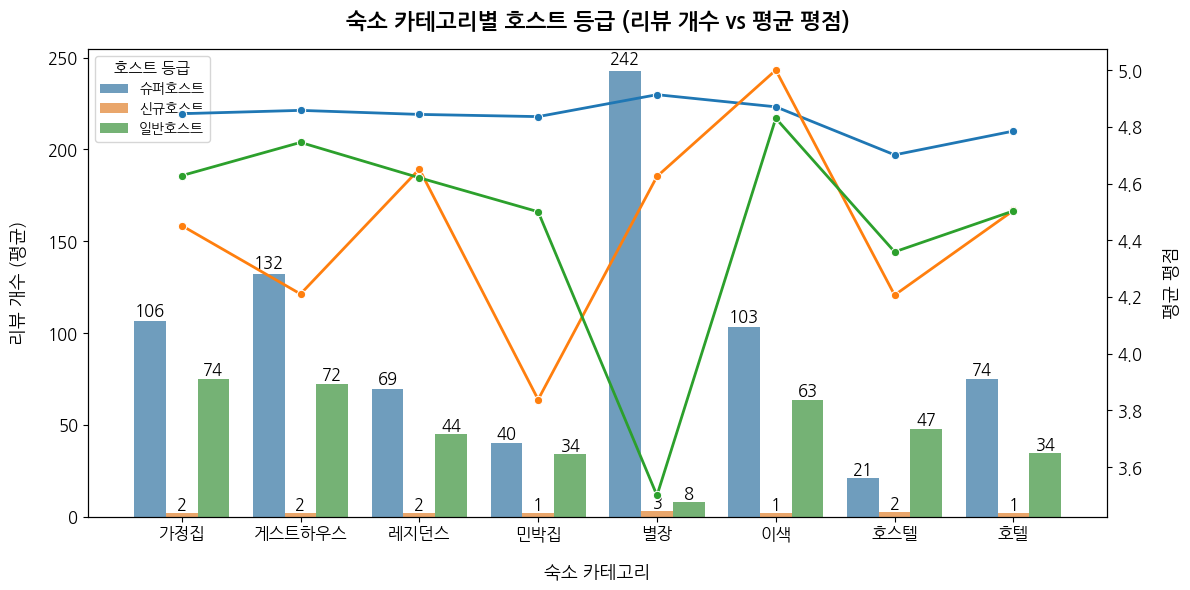

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12,6))

# 막대: 평균 리뷰 수 (왼쪽 Y축)
sns.barplot(
    data=grouped,
    x="property_category", y="review_mean",
    hue="host_level", ax=ax1, alpha=0.7
)
ax1.set_ylabel("리뷰 개수 (평균)", fontsize=13, labelpad=15)
ax1.set_xlabel("숙소 카테고리", fontsize=13, labelpad=15)
ax1.set_title("숙소 카테고리별 호스트 등급 (리뷰 개수 vs 평균 평점)",
              fontsize=16, fontweight="bold", pad=15)
ax1.tick_params(axis="y", labelsize=12)

# 막대 위에 숫자 표시
for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.text(
            p.get_x() + p.get_width()/2, height + (height*0.01),
            f"{int(height)}", ha="center", va="bottom",
            fontsize=12, color="black"
        )

# 보조축: 평균 평점 (오른쪽 Y축)
ax2 = ax1.twinx()
sns.lineplot(
    data=grouped,
    x="property_category", y="avg_rating",
    hue="host_level", ax=ax2, marker="o", linewidth=2
)
ax2.set_ylabel("평균 평점", fontsize=13, labelpad=15)
ax2.tick_params(axis="y", labelsize=12)

# 범례 정리 (겹치지 않게)
ax2.get_legend().remove()
ax1.legend(
    title="호스트 등급",
    loc="upper left",
    fontsize=10,
    title_fontsize=11
)

ax1.tick_params(axis="x", labelsize=12)   # X축 글자 크기

fig.tight_layout()
plt.show()


인사이트

- 신규호스트는 모든 숙소 카테고리에서 리뷰가 한자릿수에 불과함
    - 리뷰가 적다보니 평점은 대체로 높지만, 표본이 작아 안정성이 떨어지고 카테고리별 편차가 큼
- 일반 호스트는 슈퍼호스트와 비슷한 경쟁력을 보임
    - 리뷰 수가 많지는 않지만 게스트가 선택하기에 충분한 신뢰성을 확보하고 있음
- 슈퍼호스트는 리뷰 수도 많고 평점도 높아 게스트가 가장 신뢰하는 숙소 유형을 형성함

In [29]:
# 신규호스트 + 개인·공유 숙소 + 리뷰 1개인 숙소 찾기
target = df_clean[
    (df_clean["host_level"] == "신규호스트") &
    (df_clean["property_category"] == "개인·공유 숙소") &
    (df_clean["number_of_reviews"] == 1)
]

# 확인할 컬럼만 출력 (예: id, 이름, URL, 리뷰 수 등)
print(target[["id", "name", "listing_url", "number_of_reviews", "review_scores_rating"]])

Empty DataFrame
Columns: [id, name, listing_url, number_of_reviews, review_scores_rating]
Index: []
